 # Анализ игр на рынке

Описание проекта

Вы работаете в интернет-магазине «Стрим», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

Описание данных

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales`— продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Цель: найти закономерности в датасете

План работы:

- выполнить предобработку данных
- провести исследовательский анализ данных
- составить портрет пользователя каждого региона
- проверить гипотезы
- сделать выводы

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from IPython.display import Image

In [2]:
plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [3]:
try:
    df = pd.read_csv('C:/Users/belle/OneDrive/Документы/датасеты/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

## Обзор данных

In [4]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<AxesSubplot:>

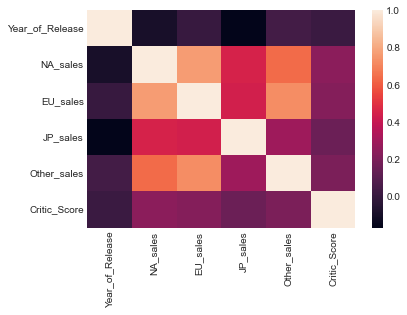

In [6]:
sns.heatmap(df.corr())

В датасете 16715 строк, 11 колонок.

Много пропусков в столбцах "Critic_Score", "User_Score", "Rating". Также есть пропуски в названии игры и дате выпуска

Есть сильная зависимость между продажами в Северной Америке и Европе, а также продажами в других странных (кроме Японии)

## Подготовка данных

In [7]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
df[df.duplicated()] #поиск дубликатов

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


In [9]:
df['Genre'].unique() #поиск неявных дубликатов с толбце с жанрами

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [10]:
df['Platform'].unique() #поиск неявных дубликатов с толбце с платформами

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Дубликаты не обнаружили

In [11]:
df = df.rename(str.lower, axis = 'columns')  # привели названия столбцов к нижнему регистру

In [12]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
df.info()  #посмотрим пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [14]:
df = df.query('~name.isna()') #уберем строки, в которых нет названия игр

In [15]:
len(df.query('year_of_release.isna()')) # найдем кол-во строк, в которых пропущен год выпуска

269

269 - это 1.6% от 16714. Поэтому мы удалим строки, в которых пропущен год выпуска

In [16]:
df = df.query('~year_of_release.isna()') #удалили строки, где нет года выпуска

Итог :

`name` - 2 пропуска, их удалили, так как без названия игры теряется смысл всей строки

`year_of_release` - 269 пропусков (1,6% от всего df). Удалили, так как их мало

`critic_score`, `user_score`, `rating` - оставили пропуски, так как их очень много и логическим способом заполнить пропуски нельзя

Причины, которые могли привести к пропускам:

- отсутсвие данных 
- отсутсвие рейтинга у игры
- неправильно записаны/прочитаны данные


In [17]:
df['user_score'].unique() #выведем уникальные значения в столбце оценка пользователей

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [18]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN) #есть объект типа object - его заменим на nan

tbd означает "To Be Determined". Заменили это значение на пропуск (NaN)

In [19]:
df['year_of_release'] = df['year_of_release'].astype('Int64') #изменим тип данных
df['critic_score'] = df['critic_score'].astype('Int64')
df['user_score'] = df['user_score'].astype('float')


В столбцах `year_of_release` и `critic_score` поменяли тип данных с float на int, так как там целочисленные значения

В `user_score` поменяли тип данных с object на float, так как там числовые дробные значения

In [20]:
df #проверка результатов

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [21]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] #добавим новый столбец

В столбце `total_sales` сумарные продажи во всех регионах

In [22]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,0.01


Датафрейм готов к работе. Мы очистили и привели в порядок данные, а именно:
- проверили датасет на явные и неявные дубликаты
- удалили строки, где есть пропуски в названии или в годе выпуска
- привели названия столбцов к нижнему регистру
- заменили tbd на None, так как это означает, что рейтинг еще не сформирован
- изменили типы данных в столбцах `year_of_release`, `critic_score` и `user_score`
- добавили столбец с суммарными продажами во всех регионах

In [23]:

# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
    print('-'* 25)
    print(col_l, temp[col_l].sort_values().unique())
    print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n


В столбце рейтинг 40,6% пропущено. Это может указывать на то, что данных нет. Или же стоит учесть тот факт, что этот рейтинг для игр ставится только в  США и Канаде. Поэтому лучше поставить заглушку - 0:

In [24]:
df['rating'] = df['rating'].fillna('missed')

## Исследовательский анализ данных

### Проведем анализ рассматриваемого периода

Посмотрим, сколько игр выпускалось в разные годы

In [25]:
quantity_year = df.groupby('year_of_release')['name'].count() #группировка игр по годам
quantity_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

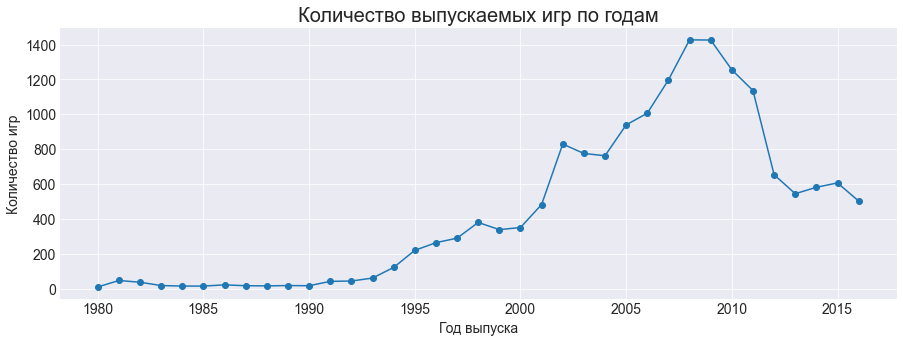

In [26]:
plt.figure(figsize=(15,5))
plt.plot(quantity_year, 'o-')
plt.title('Количество выпускаемых игр по годам', fontsize = 20)
plt.xlabel('Год выпуска', fontsize = 14)
plt.ylabel('Количество игр', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

Начиная с 1995 в прокат стало выходить более 200 игр в год. 

Для последующего анализа данных будем использовать игры, выпущенные не раннее 1995 года, так как именно в это время игры набирают свою популярность

In [27]:
df = df[df['year_of_release'] > 1994] #осортируем датафрейм

В датафрейме теперь игры, которы выпущены после 1994 года

### Проанализируем платформы 

In [28]:
popular_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending = False) #найдем самые популярные платформы
popular_platform.head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       721.55
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

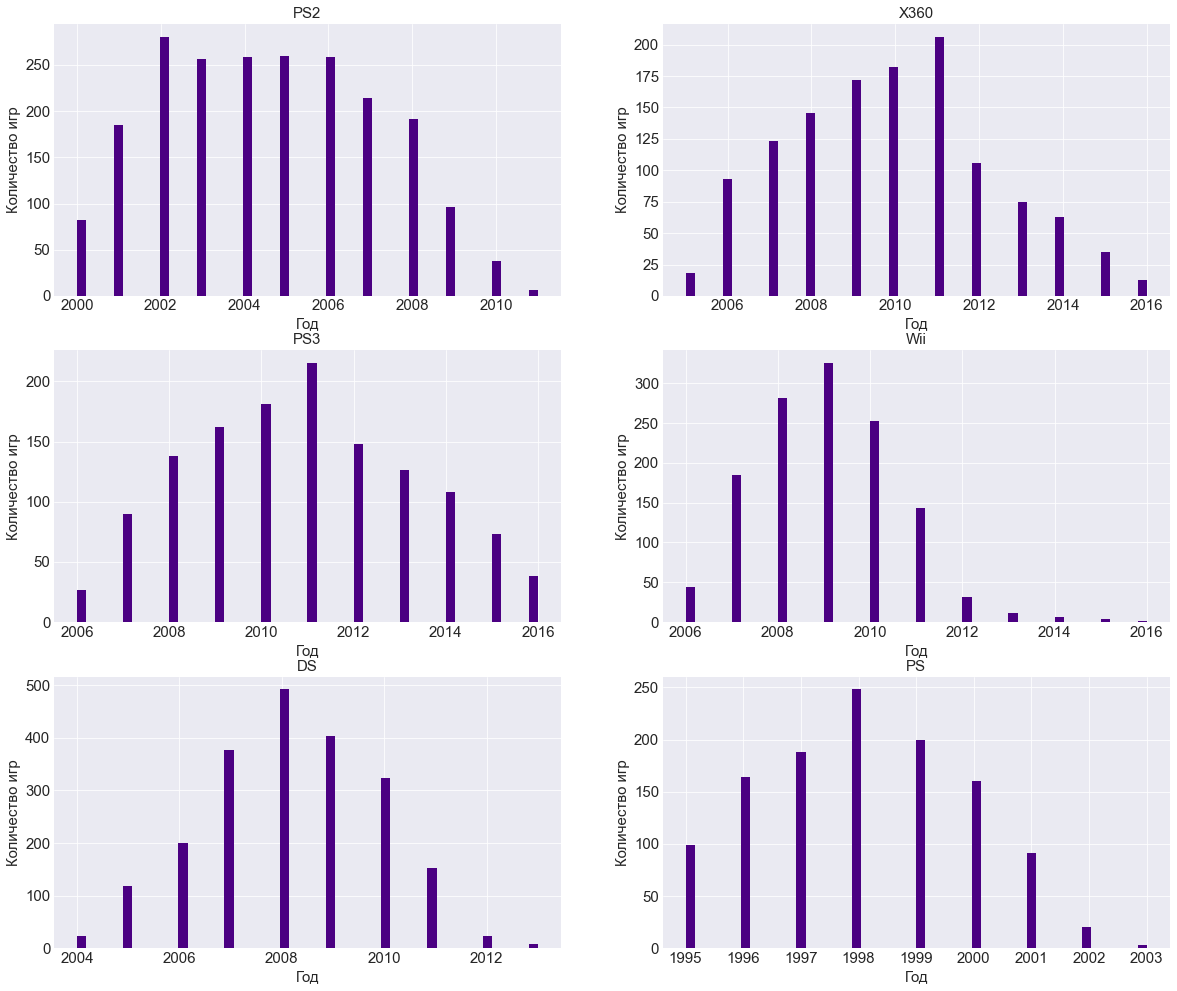

In [29]:
plt.figure(figsize=(20,17)) #посотроим распределение по годам для топ-6 платформ
x = 1
for e in popular_platform.index[:6]:
    plt.subplot(3,2,x)
    df.query('platform == @e')['year_of_release'].plot(kind = 'hist', 
                                                      bins = 50,
                                                     #title= e,
                                                     color = 'indigo',
                                                       fontsize = 10)
    plt.title(e, fontsize=15)
    plt.ylabel('Количество игр', fontsize = 15)
    plt.xlabel('Год', fontsize = 15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    x+=1

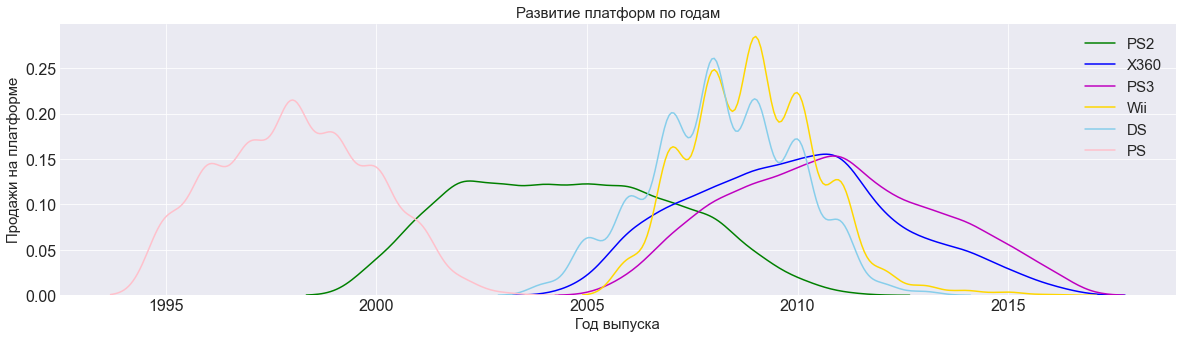

In [30]:
plt.figure(figsize=(20,5)) #построим еще один график чтобы увидеть общую картину
x = 0
color = ['g', 'b', 'm', 'gold', 'skyblue', 'pink', 'peru']
for e in popular_platform.index[:6]:
    sns.kdeplot(df.query('platform == @e')['year_of_release'], 
                            label=e, alpha=1,                      
                            color = color[x])
    x+=1
plt.ylabel('Продажи на платформе', fontsize=15)
plt.xlabel('Год выпуска', fontsize=15)
plt.legend(prop={'size': 15})
plt.title('Развитие платформ по годам', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()


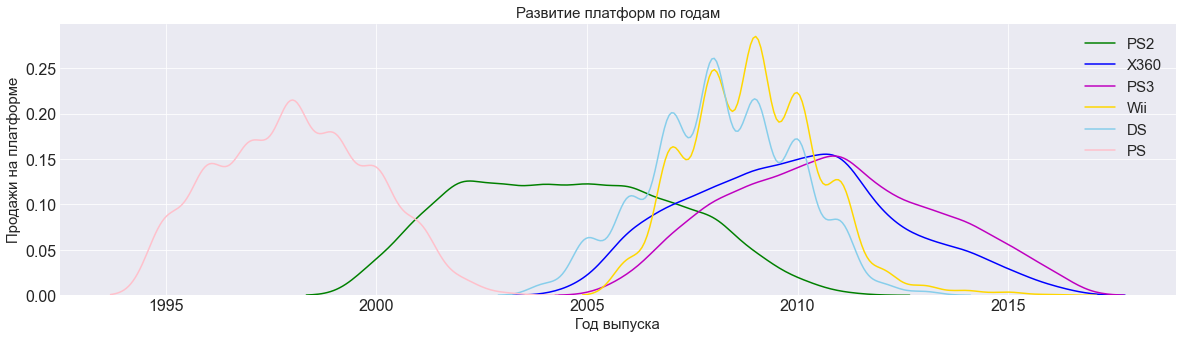

Проанализируем каждую платформу

1. **PS2**  2000-2011 года, пик с 2002 по 2006
2. **Х360**  2005-2016, пик в 2011
3. **PS3**  2006-2016, пик в 2011
4. **Wii**  2006-2016, пик в 2009
5. **DS**  2004-2013, пик в 2008
6. **PS**  1994-2003, пик в 1998


Можно выстроить последовательность появления плафторм:
1. PS
2. PS2
3. DS
4. Wii
5. PS3
6. X360


1. Пик популярности продаж игр (самые высокие продажи на платформах) приходится на 2007-2010 года
2. До 2004 года в основном игры выходили на одной, максимум двух платформах
3. Начиная с 2005 года игры начали выходить на трех и более платформах
4. В среднем платформы активно работают около 9-11 лет, потом их сменяют новые.


### Определение актаульного периода для анализа данных


Для анализа возьмем период с 2013 по 2016 год

In [31]:
df = df[df['year_of_release'] > 2012] #возьмем время, начиная с 2013 года
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,missed,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,missed,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,missed,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,missed,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,missed,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,missed,0.01


Как итог - актуальный период с 2010 по 2016

### Анализ платформ на актуальный период

In [32]:
platform =df.groupby('platform')['total_sales'].sum().sort_values(ascending=False) #найдем топ платформ по продажам
platform

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

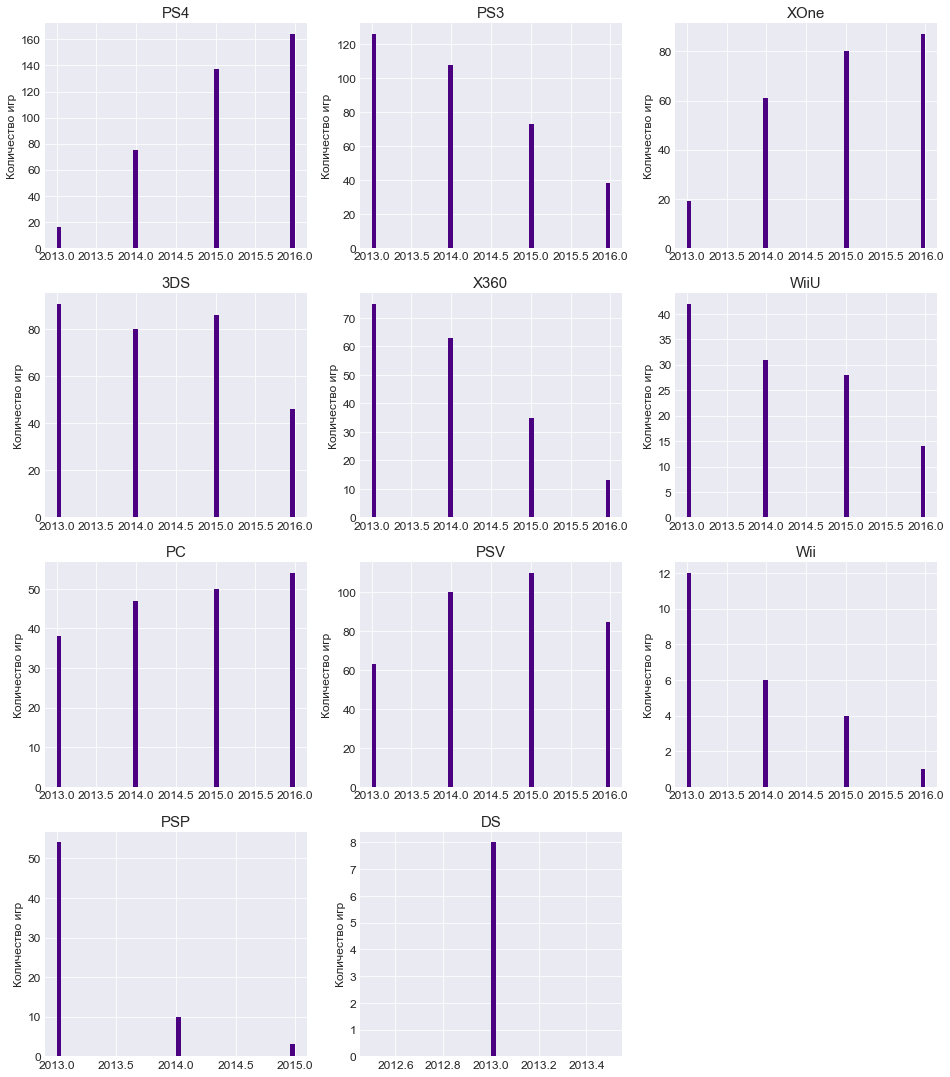

In [33]:
plt.figure(figsize=(16,19)) #посотроим распределение по годам для топ-12 платформ
x = 1
for e in platform.index[:12]:
    plt.subplot(4,3,x)
    df.query('platform == @e')['year_of_release'].plot(kind = 'hist', 
                                                      bins = 50,
                                                     #title= e,
                                                     color = 'indigo')
    plt.ylabel('Количество игр', fontsize = 12)
    #plt.xlabel('Год выпуска', fontsize = 12)
    plt.title(e, fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=12)
    x+=1
plt.show()

C:\Users\belle\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


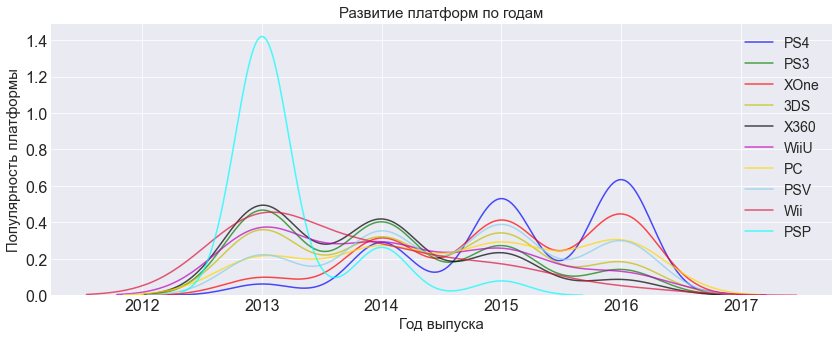

In [34]:
plt.figure(figsize=(14,5))
x = 0
color = ['b', 'g', 'r', 'y', 'k', 'm', 'gold', 'skyblue', 'crimson', 'aqua', 'pink', 'peru']
for e in platform.index[:12]:
    sns.kdeplot(df.query('platform == @e')['year_of_release'],
                                 label=e, alpha=.7,
                                color = color[x])
    x+=1

    
plt.ylabel('Популярность платформы', fontsize=15)
plt.xlabel('Год выпуска', fontsize=15)
plt.legend(prop={'size': 15})
plt.title('Развитие платформ по годам', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=16)
    
plt.legend(prop={'size': 14})
plt.show()


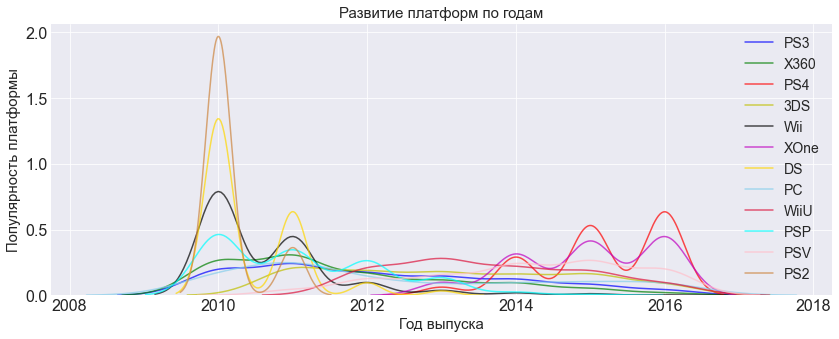

- продажи уже несколько лет падают на платформах PS3, X360,Wii,PSP, PS2, WiiU
- продажи растут на PS4, XOne, PC
- начинают терять свою актуальность платформы 3DS, PSV


Лидеры по продажам в последние 5 лет(2014-2016г), а также потенциально прибыльные платформы: ХOne, PS4

### Диаграмма размаха по глобальным продажам игр в разбивке по платформам

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

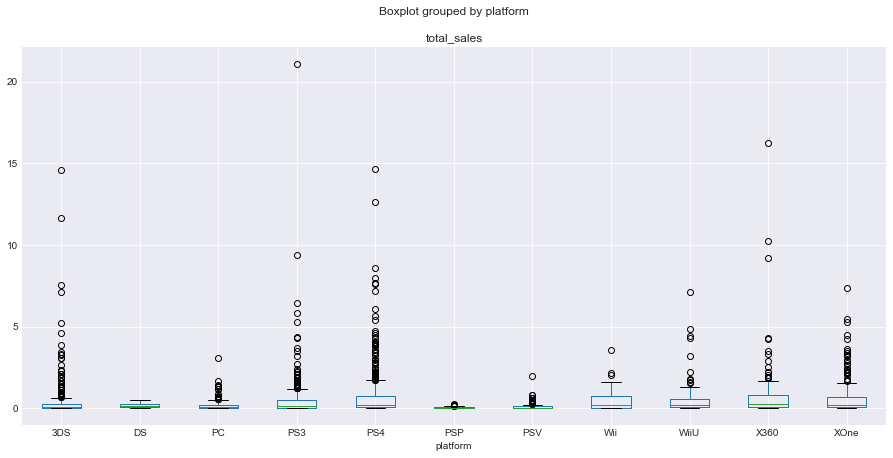

In [35]:
df.boxplot(by='platform', column='total_sales',figsize=(15,7))
#plt.ylim(0,5)


Для детального рассмотрения построим еще два графика

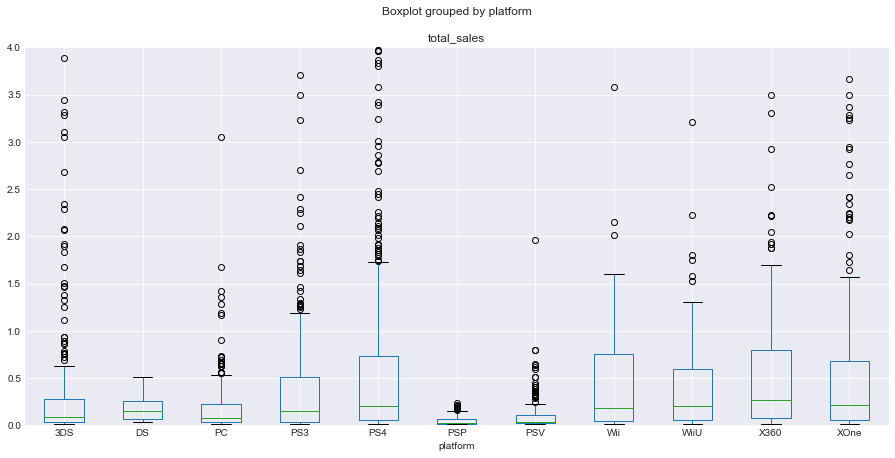

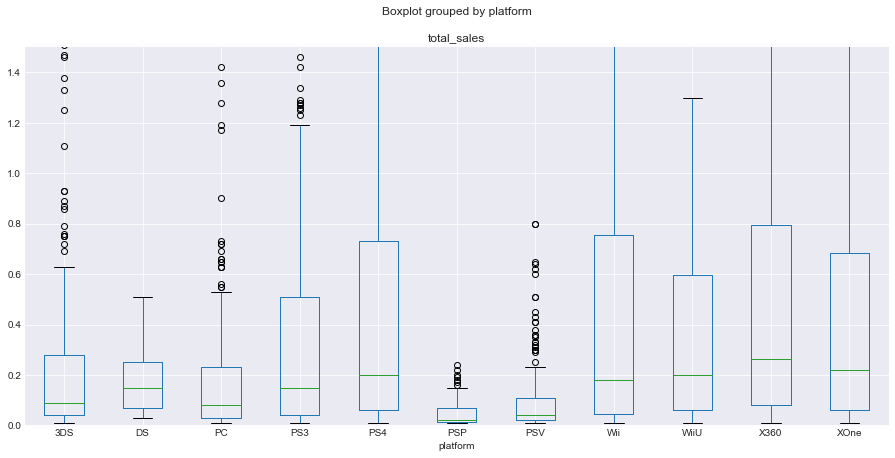

In [36]:
df.boxplot(by='platform', column='total_sales',figsize=(15,7))
plt.ylim(0, 4)

df.boxplot(by='platform', column='total_sales',figsize=(15,7))
plt.ylim(0, 1.5)
plt.show()



По графику видно, что больше всего продаж на X360, XOne, PS4, WiiU, Wii
Меньше всего продаж на PSP и PSV

Больше всего вбросов (то есть успешно проданных игр в большом количестве) на платформах X360, PS3, 3DS И PS4


Меньше всего вбросов, что означает отсутсвие игр, которые были скуплены в большом тираже на платформах PS2, PSV И DS

### Анализ влияния отзывов на продажи

Для начала посмотрим какие оценки обычно ставят критики и пользователи

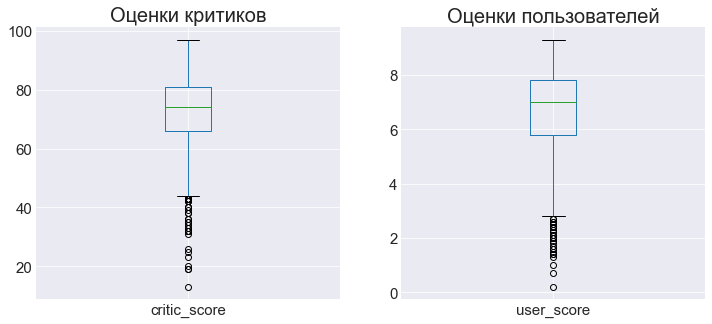

In [37]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df.boxplot('critic_score')
plt.title('Оценки критиков', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(1,2,2)
df.boxplot('user_score')
plt.title('Оценки пользователей', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

In [38]:
print(df['critic_score'].median())
print(df['user_score'].median())

74.0
7.0


В среднем критики ствят оценку от 60 до 80, медиана 73

В среднем пользователи ставят оценку от 6 до 8 баллов, медиана 7

У критиков и пользователей разная шкала оценивания, но по соотношению баллы ставят примерно одинаково

На диаграмме больше выбросов на шкале с оценкой пользователей. Это значит, что пользователи чаще оценивают игры малым количеством баллов

In [39]:
platform.head()

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64

Рассмотрим платформу PS3

In [40]:
ps3 = df.query('platform == "PS3"') # в датайрейме только игры с ps3
ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71,2.6,M,9.36
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86,4.3,E,6.46
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95,9.1,M,5.86
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,<NA>,NaN,missed,5.27
...,...,...,...,...,...,...,...,...,...,...,...,...
16558,Naruto Shippuden: Ultimate Ninja Storm Collection,PS3,2016,Action,0.00,0.01,0.00,0.00,<NA>,NaN,missed,0.01
16638,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,<NA>,NaN,missed,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,missed,0.01


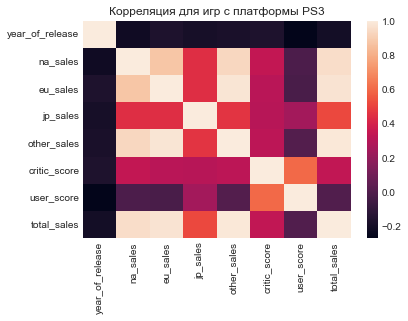

In [41]:
sns.heatmap(ps3.corr())
plt.title('Корреляция для игр с платформы PS3', fontsize=12);

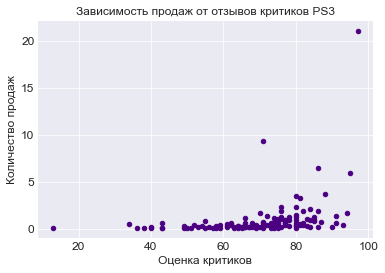

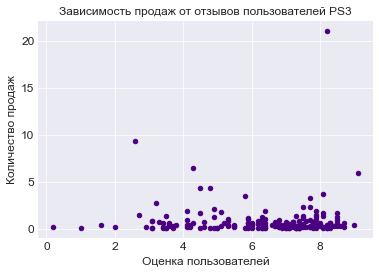

In [42]:
ps3.plot(kind='scatter', y='total_sales', x = 'critic_score', fontsize=12, color='indigo')
plt.ylabel('Количество продаж', fontsize=12)
plt.xlabel('Оценка критиков', fontsize=12)
plt.title('Зависимость продаж от отзывов критиков PS3', fontsize=12);

ps3.plot(kind='scatter', y='total_sales', x = 'user_score', fontsize=12, color='indigo')
plt.ylabel('Количество продаж', fontsize=12)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.title('Зависимость продаж от отзывов пользователей PS3', fontsize=12);

Cудя по корреляции, на платформе PS3 сильной связи между продажами и отзывами не найдено. Как и между отзывами критиков и пользователей

По диаграммам расеивания видно:

1. С повышением оценки критиков увеличиваются продажи игр, но есть много игр с высоким рейтингом и низкими продажами

2. Можно увидеть связь, что чем выше оценка пользователей - тем больше глобальных продаж у игры, но это не всегда пропорционально. 

Все-таки оценки критиков более пропорциональны продажам, чем оценки критиков

In [43]:
df.groupby('platform')['name'].count().sort_values(ascending=False)

platform
PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: name, dtype: int64

Сравним несколько платформ

In [44]:
ps4 = df.query('platform == "PS4"')
x360 = df.query('platform == "X360"')
xone = df.query('platform == "XOne"')

Для сравнения построим несколько графиков корреляции

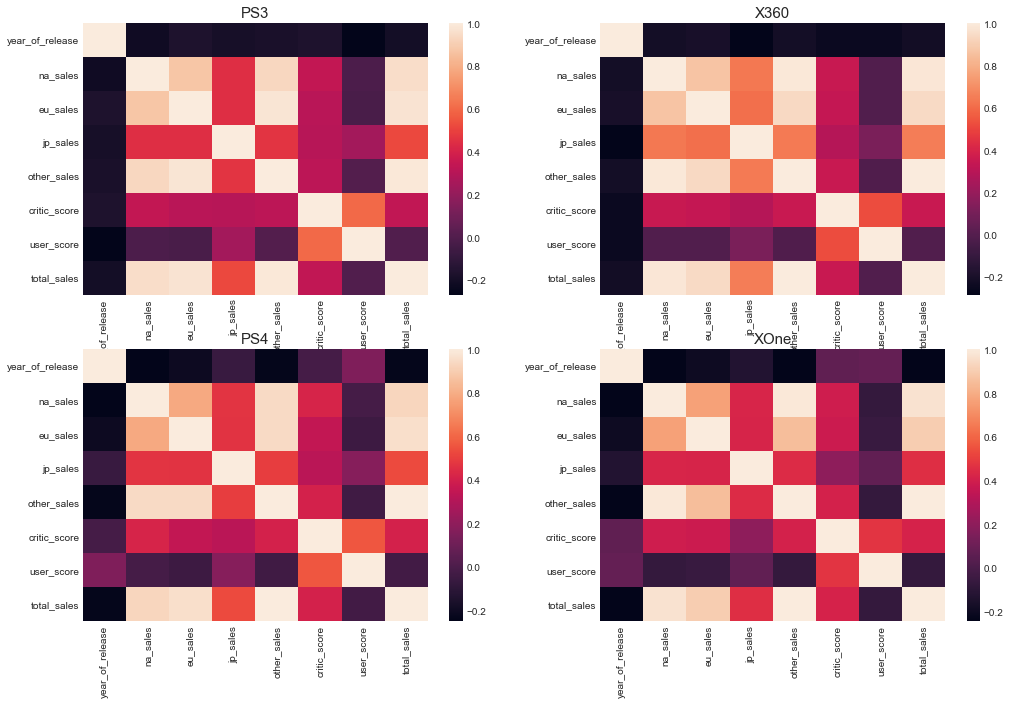

In [45]:
plt.figure(figsize=(17,11))
plt.subplot(2,2,1)
sns.heatmap(ps3.corr())
plt.title('PS3', fontsize=15) 
plt.subplot(2,2,2)
sns.heatmap(x360.corr())
plt.title('X360', fontsize=15) 
plt.subplot(2,2,3)
sns.heatmap(ps4.corr())
plt.title('PS4', fontsize=15) 
plt.subplot(2,2,4)
sns.heatmap(xone.corr())
plt.title('XOne', fontsize=15) 
plt.show()

Графики корреляции похожи, на всех диаграммах не видна зависимость между продажами и отзывами. Есть легкая связь между отзывами критиков и отзывами пользователей.




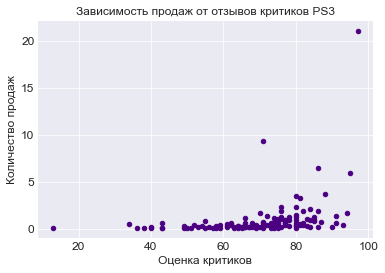

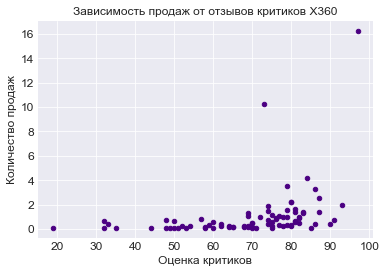

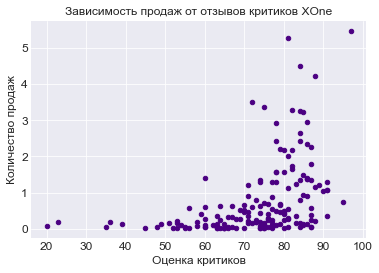

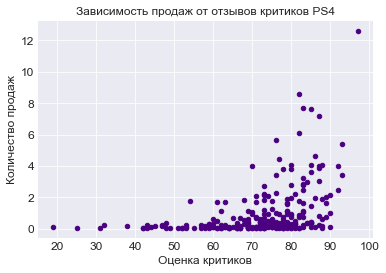

In [46]:
ps3.plot(kind='scatter', y='total_sales', x = 'critic_score', fontsize=12, color='indigo')
plt.ylabel('Количество продаж', fontsize=12)
plt.xlabel('Оценка критиков', fontsize=12)
plt.title('Зависимость продаж от отзывов критиков PS3', fontsize=12);

x360.plot(kind='scatter', y='total_sales', x = 'critic_score', fontsize=12, color='indigo')
plt.ylabel('Количество продаж', fontsize=12)
plt.xlabel('Оценка критиков', fontsize=12)
plt.title('Зависимость продаж от отзывов критиков X360', fontsize=12);

xone.plot(kind='scatter', y='total_sales', x = 'critic_score', fontsize=12, color='indigo')
plt.ylabel('Количество продаж', fontsize=12)
plt.xlabel('Оценка критиков', fontsize=12)
plt.title('Зависимость продаж от отзывов критиков XOne', fontsize=12);

ps4.plot(kind='scatter', y='total_sales', x = 'critic_score', fontsize=12, color='indigo')
plt.ylabel('Количество продаж', fontsize=12)
plt.xlabel('Оценка критиков', fontsize=12)
plt.title('Зависимость продаж от отзывов критиков PS4', fontsize=12);

Мы построили диаграммы зависимости количества продаж от отзывов критиков по каждой платформе.

Pависимость продаж и отзывов на платформах пропорциональна. Больше всего продаж у игр с высокими оценками. Но высокий рейтинг не всегда гарантирует большие продажи.



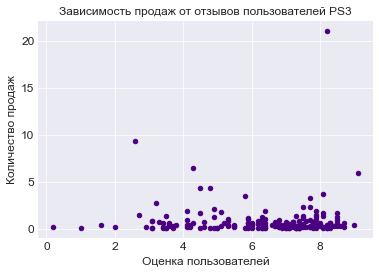

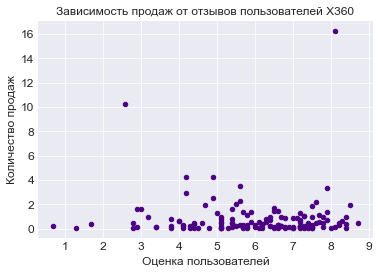

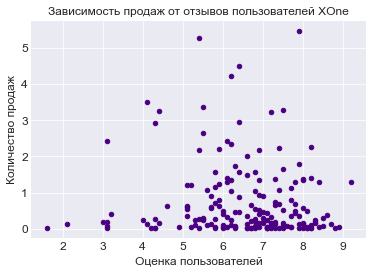

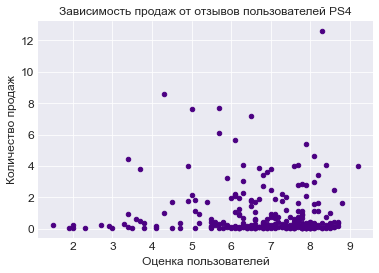

In [47]:
ps3.plot(kind='scatter', y='total_sales', x = 'user_score', fontsize=12, color='indigo')
plt.ylabel('Количество продаж', fontsize=12)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.title('Зависимость продаж от отзывов пользователей PS3', fontsize=12);

x360.plot(kind='scatter', y='total_sales', x = 'user_score', fontsize=12, color='indigo')
plt.ylabel('Количество продаж', fontsize=12)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.title('Зависимость продаж от отзывов пользователей X360', fontsize=12);

xone.plot(kind='scatter', y='total_sales', x = 'user_score', fontsize=12, color='indigo')
plt.ylabel('Количество продаж', fontsize=12)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.title('Зависимость продаж от отзывов пользователей XOne', fontsize=12);

ps4.plot(kind='scatter', y='total_sales', x = 'user_score', fontsize=12, color='indigo')
plt.ylabel('Количество продаж', fontsize=12)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.title('Зависимость продаж от отзывов пользователей PS4', fontsize=12);

Распределение оценок пользователей наиболее хаотично, если сравнивать с оценками критиков.

Особенно хочется отметить платформц Wii, у который очень сильный разброс

Трудно по оценкам пользователей предугадать какие будут продажи

Итак
- зависимость между оценкой критиков и проданными копиями больше, чем между оценкой пользователей и проданными играми
- больше всего продаж у игр с высокими оценками от критиков, но хороший рейтинг от критиков не показатель выоских продаж
- отзывы пользователей слабо влияют на продажу игры


### Распределение игр по жанрам


In [48]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,missed,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,missed,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,missed,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,missed,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,missed,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,missed,0.01


In [49]:
genre = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

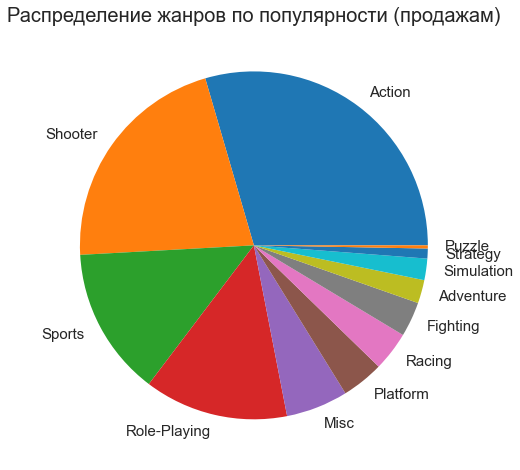

In [50]:
genre.plot(kind='pie', subplots=True, figsize=(8, 8), fontsize=15)
plt.title("Распределение жанров по популярности (продажам)", fontsize=20)
plt.ylabel("")
plt.show()


Построим диаграму размаха по жанрам

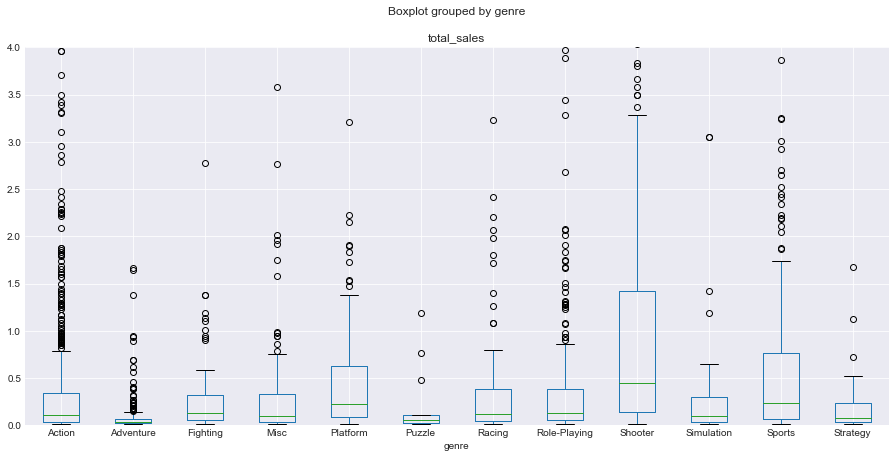

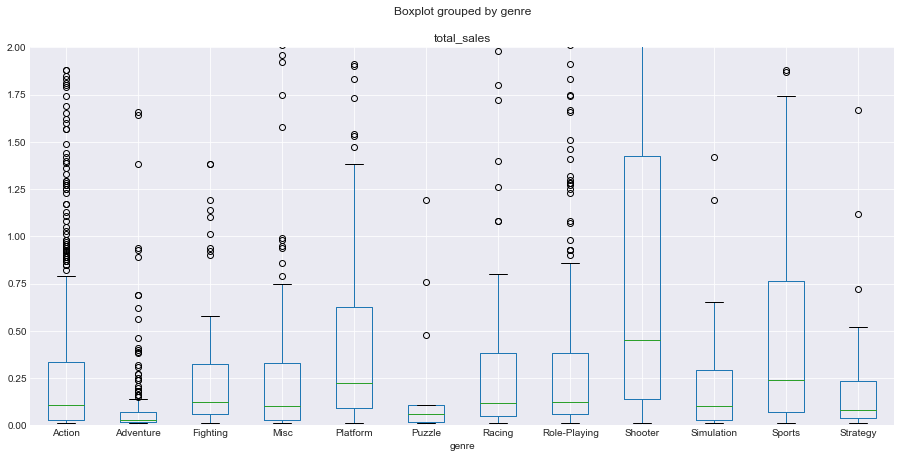

In [51]:
df.boxplot(by='genre', column='total_sales',figsize=(15,7))
plt.ylim(0,4)

df.boxplot(by='genre', column='total_sales',figsize=(15,7))
plt.ylim(0,2)

plt.show()



Самые популярные жанры - шутер, cпортивные игры, платформеры

У игры жанра экшн больше всего вбросов, поэтому круговая диаграмма не показала всей картины


Широко распространенные жанры требуют быстрого реагирования и  в них происходит интенсивный игровой процесс.

Наименее популярные жанры (пазлы, стратегии, приключения, симуляция) требует наиболее долгого погружения в игру, победа в игре в основном зависит не от скорости реакции, а от умственного потенциала игрока

Вывод по статитистическому анализу данных:

До 1995 года выпускалось менее чем 200 игр в год, поэтому данный период нет смысла рассматривать для анализа.

Средняя продолжительность активной работы платформы - это 9-11 лет. Платформы на рынке сменяют друг друга, и, если располагать платформы в историческом порядке их работы, то они будут расположены следующим образом: PS, PS2, DS, Wii, PS3, X360.

С 2005 по 2010 года одновременно 5 платформ размещали игры (для сравнения ддо 2002 их было максимум 2)

Для анализа мы взяли игры, которые были выпущены 7 лет назад, то есть, начная с 2010 года. Так как средняя активность платформы 9-11 лет, то 7 лет - оптимальное время для рассмотрения данных.

В 2010 году на платформе DS было продано свыше 300 игр, что является рекордом на данный момент. в Последние три года (с 2014 по 2016) наиболее поплуярные платформы - PS4 и XOne, но их продажи идут волнообразно и сложно построить траекторию их дальнейшего развития.

Остальные платформы (PS3, X360,Wii, DS, PSP, PS2, WiiU) уже почти потеряли свою актуальность.

Диаграмма размаха подтверждает вышесказанные слова, а именно показывает что большинство игр продавалась на PS4. А меньше всего на PS2, DS и PSV.

Интересная ситуация с платформой XOne - на ней и нет много игр с высокими продажами, хотя выше мы ее оценили как потенциально прибыльную платформу. Возможно, она только начинает набирать обороты и поэтому на ней нет высоких продаж.

Высокие рейтинги от критиков гарантируют высокие продажи чаще, чем отзывы обчыных пользователей. Высокие продажи обычно у игр с рейтингом 80+. А четкой зависимости продаж и рейтингов от пользователей нет. Но не всегда стоит смотреть на рейтинг, так как и у высокорейтинговых игр может быть маленькое количество продаж.

Самые часто продаваемые жанры динамичны и требуют полноценного внимания и быстрой реакции. Это  шутер, спортивные игры, платформеры. Наименее популярные жанры - пазлы, стратегии, приключения, симуляция. В них нет динамики, не требуется быстрая реакция и сосредоточение внимания.

## Портрет пользователя каждого региона

Мы будем проводить сравнительный анализ сразу по трем портретам, потому что все познается в сравнении :)
    

In [52]:
users = ['na_sales', 'eu_sales', 'jp_sales']

In [53]:
print('Cуммарное количество проданных игр')
for e in users:
    print(e, df[e].sum())

Cуммарное количество проданных игр
na_sales 437.71
eu_sales 392.23
jp_sales 140.78000000000003


Больше всего игры пользвуются популярностью в Америке, далее идет Европа и Япония

Но такое сравнение не совсем корректно, так как данные регионы сильно отличаются по своей площади и плотностью населения

**Топ популярных платформ**

In [54]:
top_platform = df.pivot_table(index = 'platform', values=['jp_sales','eu_sales','na_sales' ], aggfunc = 'sum').sort_values(by='na_sales', ascending = False)

In [55]:
top_platform #продажи на каждой платформе в каждом регионе

,eu_sales,jp_sales,na_sales
platform,,,
PS4,141.09,15.96,108.74
XOne,51.59,0.34,93.12
X360,42.52,0.51,81.66
PS3,67.81,23.35,63.50
3DS,30.96,67.81,38.20
WiiU,19.85,10.88,29.21
PC,25.36,0.00,11.11
Wii,5.93,0.05,6.56
PSV,6.10,18.59,5.04


Для дальнейшей рабты уберем строки, в которых на платформе во всех трех странах не больше 9 млн продаж:

In [56]:
top_platform.query('eu_sales < 9 and eu_sales < 9 and jp_sales < 9') #проверим, те ли строки убираем

,eu_sales,jp_sales,na_sales
platform,,,
Wii,5.93,0.05,6.56
DS,0.85,0.00,0.57
PSP,0.17,3.29,0.00


In [57]:
top_platform = top_platform.query('~(eu_sales < 9 and eu_sales < 9 and jp_sales < 9)')
top_platform

,eu_sales,jp_sales,na_sales
platform,,,
PS4,141.09,15.96,108.74
XOne,51.59,0.34,93.12
X360,42.52,0.51,81.66
PS3,67.81,23.35,63.50
3DS,30.96,67.81,38.20
WiiU,19.85,10.88,29.21
PC,25.36,0.00,11.11
PSV,6.10,18.59,5.04


Добавим в таблицу доли продаж:

In [58]:
top_platform['share_eu_%'] = round(top_platform['eu_sales']*100 / top_platform['eu_sales'].sum())
top_platform['share_jp_%'] = round(top_platform['jp_sales']*100 / top_platform['jp_sales'].sum())
top_platform['share_na_%'] = round(top_platform['na_sales']*100 / top_platform['na_sales'].sum())
import warnings
warnings.filterwarnings("ignore")

C:\Users\belle\AppData\Local\Temp\ipykernel_19012\3426467110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_platform['share_eu_%'] = round(top_platform['eu_sales']*100 / top_platform['eu_sales'].sum())
C:\Users\belle\AppData\Local\Temp\ipykernel_19012\3426467110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_platform['share_jp_%'] = round(top_platform['jp_sales']*100 / top_platform['jp_sales'].sum())
C:\Users\belle\AppData\Local\Temp\ipykernel_19012\3426467110.py:3: SettingWithCopyWarning:

In [59]:
top_platform

,eu_sales,jp_sales,na_sales,share_eu_%,share_jp_%,share_na_%
platform,,,,,,
PS4,141.09,15.96,108.74,37.0,12.0,25.0
XOne,51.59,0.34,93.12,13.0,0.0,22.0
X360,42.52,0.51,81.66,11.0,0.0,19.0
PS3,67.81,23.35,63.50,18.0,17.0,15.0
3DS,30.96,67.81,38.20,8.0,49.0,9.0
WiiU,19.85,10.88,29.21,5.0,8.0,7.0
PC,25.36,0.00,11.11,7.0,0.0,3.0
PSV,6.10,18.59,5.04,2.0,14.0,1.0


Рассмотрим каждую страну. Начнем с Америки

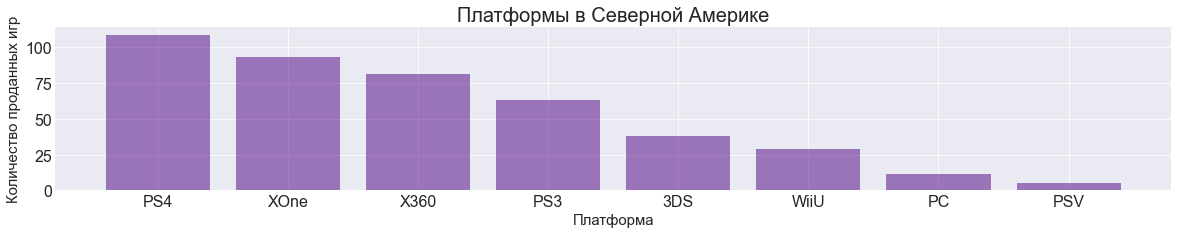

In [60]:
plt.figure(figsize=(20,3))
plt.bar(top_platform.index, top_platform['na_sales'], color = 'indigo', alpha = 0.5)
plt.title('Платформы в Северной Америке', fontsize = 20)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Количество проданных игр', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [61]:
top_platform.loc[:,['na_sales', 'share_na_%']].head(7) #платформы в Северной Америке и доли продаж

,na_sales,share_na_%
platform,,
PS4,108.74,25.0
XOne,93.12,22.0
X360,81.66,19.0
PS3,63.50,15.0
3DS,38.20,9.0
WiiU,29.21,7.0
PC,11.11,3.0



Самые популярные платформы в Северной Америке (в скобках указаны доли продаж):

- PS4 (25%)
- XOne (22%)
- X360 (19%)
- PS3 (15%)
- 3DS(9%)

25% всех игр покупают на платформе PS4, 22% игр на XOne. Это две самые популярные платформы в Америке

Рассмотрим Европу

In [62]:
top_platform.loc[:,['eu_sales', 'share_eu_%']].sort_values(ascending=False, by='eu_sales').head(7)

,eu_sales,share_eu_%
platform,,
PS4,141.09,37.0
PS3,67.81,18.0
XOne,51.59,13.0
X360,42.52,11.0
3DS,30.96,8.0
PC,25.36,7.0
WiiU,19.85,5.0


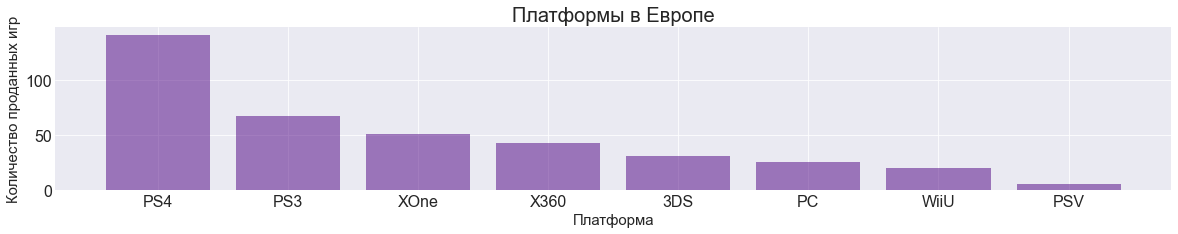

In [63]:
x = top_platform.loc[:,['eu_sales', 'share_eu_%']].sort_values(ascending=False, by='eu_sales')
plt.figure(figsize=(20,3))
plt.bar(x.index, x['eu_sales'], color = 'indigo', alpha = 0.5)
plt.title('Платформы в Европе', fontsize = 20)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Количество проданных игр', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()


Самые популярные платформы в Европе (в скобках указаны доли продаж):

- PS4 (37%)
- PS3 (18%)
- XOne (13%)
- X360 (11%)
- 3DS (8%)
37% всех игр покупают на плафторме PS4, также популярны PS3(18%) и XOne(13%)

Рассмотрим Японию

In [64]:
top_platform.loc[:,['jp_sales', 'share_jp_%']].sort_values(ascending=False, by='jp_sales').head(7)

,jp_sales,share_jp_%
platform,,
3DS,67.81,49.0
PS3,23.35,17.0
PSV,18.59,14.0
PS4,15.96,12.0
WiiU,10.88,8.0
X360,0.51,0.0
XOne,0.34,0.0


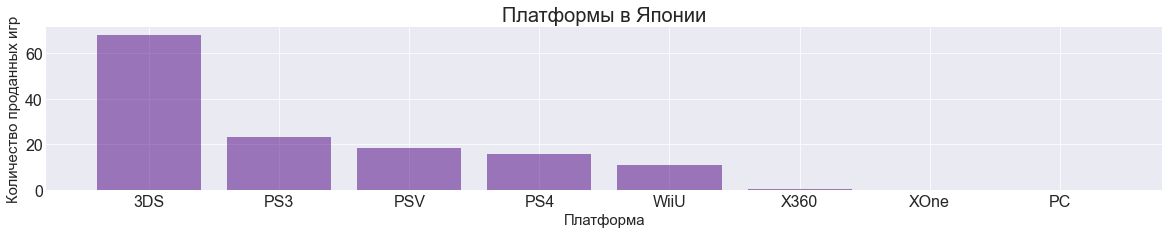

In [65]:
x = top_platform.loc[:,['jp_sales', 'share_jp_%']].sort_values(ascending=False, by='jp_sales')
plt.figure(figsize=(20,3))
plt.bar(x.index, x['jp_sales'], color = 'indigo', alpha = 0.5)
plt.title('Платформы в Японии', fontsize = 20)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Количество проданных игр', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()


Самые популярные платформы в Японии (в скобках указаны доли продаж):

- 3DS(49%)
- PS3 (17%)
- PSV (14%)
- PS4(12%)
- WiiU (8%)

Половина игр в Японии покупают на платформе 3DS, 17% на PS3 и 14% на PSV

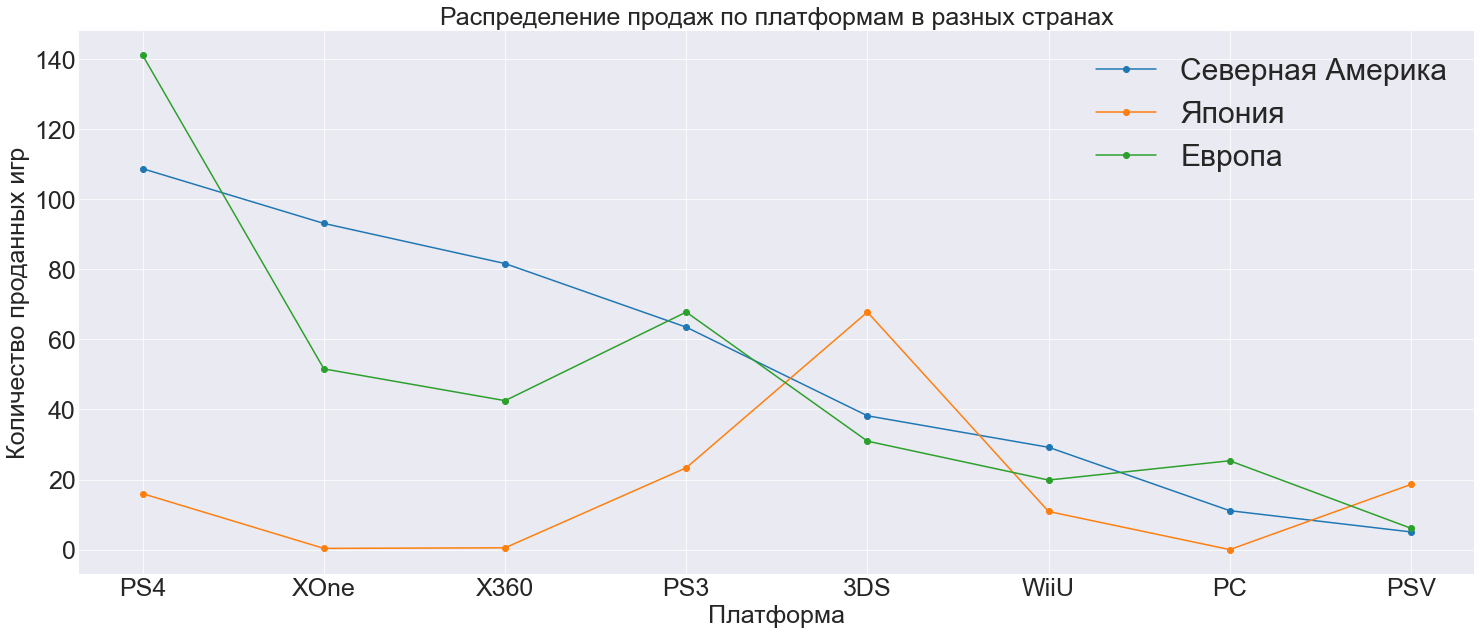

In [66]:
plt.figure(figsize=(25,10))
plt.plot(top_platform['na_sales'], 'o-', label = 'Северная Америка')
plt.plot(top_platform['jp_sales'], 'o-', label = 'Япония')
plt.plot(top_platform['eu_sales'], 'o-', label = 'Европа')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend()
plt.legend(prop={'size': 30})
plt.title('Распределение продаж по платформам в разных странах', fontsize = 25)

plt.xlabel('Платформа', fontsize=25)
plt.ylabel('Количество проданных игр', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)

plt.show()


Выведем круговые диаграммы по площадкам

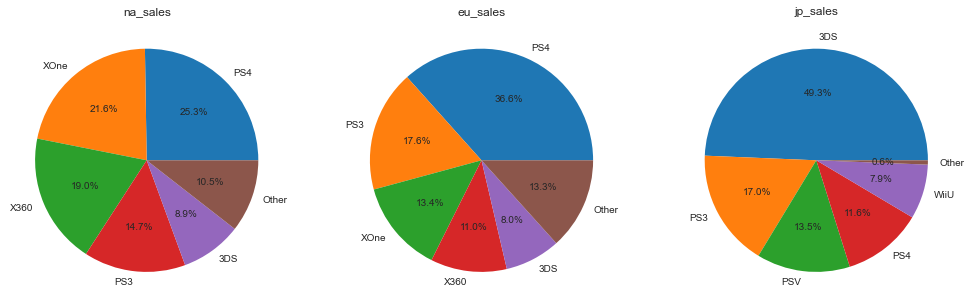

In [67]:
region = ['na_sales', 'eu_sales', 'jp_sales']
plt.figure(figsize=(17,9))
x=1
for e in region:
    plt.subplot(1,3,x)
    platform = top_platform.sort_values(by=e, ascending=False).reset_index()

    platform = platform.sort_values(by=e, ascending=False)
    sum_other = platform.loc[5:][e].sum()


    top_5 = platform[:5]

    new_row = {'platform':'Other', e:platform.loc[5:][e].sum()}
    top_5= top_5.append(new_row, ignore_index=True)
    plt.title(e)
    x+=1

    plt.pie(labels=top_5['platform'], x = top_5[e], autopct='%1.1f%%');

Вывод по платформам:

- В разных регионах популярны разные платформы
- Топ-2 платформы в каждом регионе продают  около 50% игр
- На рынке существует конкуренция между платформами


**Проанализируем популярные жанры**

In [68]:
top_genre = df.pivot_table(index = 'genre',  values=['jp_sales','eu_sales','na_sales' ], aggfunc = 'sum')
top_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.13,40.49,126.05
Adventure,8.25,5.82,7.14
Fighting,8.55,7.65,15.55
Misc,20.04,9.20,27.49
Platform,15.58,4.79,18.14
Puzzle,1.00,1.18,0.83
Racing,20.19,2.30,12.96
Role-Playing,36.97,51.04,46.40
Shooter,87.86,6.61,109.74


In [69]:
top_genre['share_eu_%'] = round(top_genre['eu_sales'] * 100 / top_genre['eu_sales'].sum())
top_genre['share_jp_%'] = round(top_genre['jp_sales'] * 100 / top_genre['jp_sales'].sum())
top_genre['share_na_%'] = round(top_genre['na_sales'] * 100 / top_genre['na_sales'].sum())

In [70]:
top_genre

,eu_sales,jp_sales,na_sales,share_eu_%,share_jp_%,share_na_%
genre,,,,,,
Action,118.13,40.49,126.05,30.0,29.0,29.0
Adventure,8.25,5.82,7.14,2.0,4.0,2.0
Fighting,8.55,7.65,15.55,2.0,5.0,4.0
Misc,20.04,9.20,27.49,5.0,7.0,6.0
Platform,15.58,4.79,18.14,4.0,3.0,4.0
Puzzle,1.00,1.18,0.83,0.0,1.0,0.0
Racing,20.19,2.30,12.96,5.0,2.0,3.0
Role-Playing,36.97,51.04,46.40,9.0,36.0,11.0
Shooter,87.86,6.61,109.74,22.0,5.0,25.0


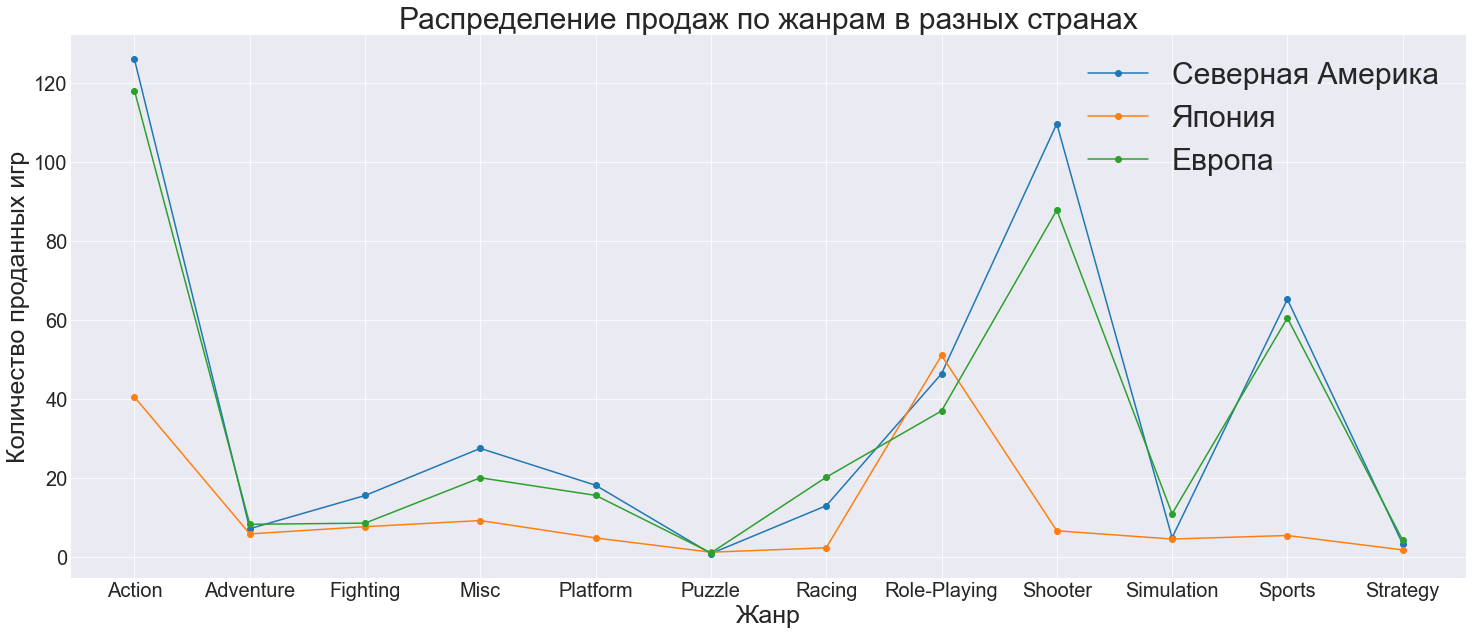

In [71]:
plt.figure(figsize=(25,10))
plt.plot(top_genre['na_sales'], 'o-', label = 'Северная Америка')
plt.plot(top_genre['jp_sales'], 'o-', label = 'Япония')
plt.plot(top_genre['eu_sales'], 'o-', label = 'Европа')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend()
plt.legend(prop={'size': 30})
plt.title('Распределение продаж по жанрам в разных странах', fontsize = 30)


plt.xlabel('Жанр', fontsize=25)
plt.ylabel('Количество проданных игр', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.show()

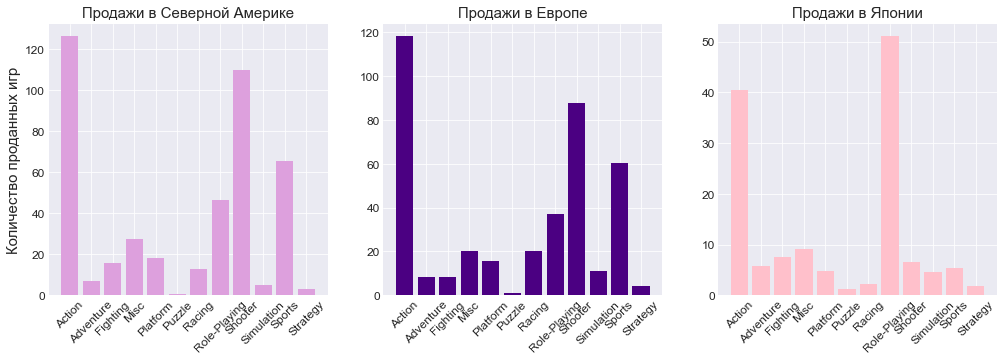

In [72]:
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.bar(top_genre.index, 
        top_genre['na_sales'], 
        color = 'plum', 
        linewidth = 100
       )
plt.xticks(rotation=45)
plt.title('Продажи в Северной Америке', fontsize=15)
plt.ylabel('Количество проданных игр', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(1,3,2)
plt.bar(top_genre.index, 
        top_genre['eu_sales'], 
        color = 'indigo', 
        linewidth = 100
       )
plt.xticks(rotation=45)
plt.title('Продажи в Европе',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(1,3,3)
plt.bar(top_genre.index, 
        top_genre['jp_sales'], 
        color = 'pink', 
        linewidth = 100
       )
plt.xticks(rotation=45)
plt.title('Продажи в Японии', fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=12)


#plt.tick_params(axis='both', labelsize=15)
plt.show()

Выведем для каждого региона топ-5 жанров

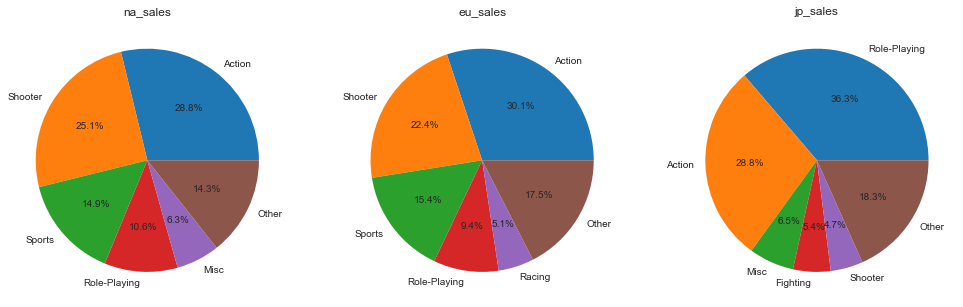

In [73]:
region = ['na_sales', 'eu_sales', 'jp_sales']
plt.figure(figsize=(17,9))
x=1
for e in region:
    plt.subplot(1,3,x)
    genre = top_genre.sort_values(by=e, ascending=False).reset_index()

    genre = genre.sort_values(by=e, ascending=False)
    sum_other = genre.loc[5:][e].sum()


    top_5 = genre[:5]

    new_row = {'genre':'Other', e:genre.loc[5:][e].sum()}
    top_5= top_5.append(new_row, ignore_index=True)
    plt.title(e)
    x+=1

    plt.pie(labels=top_5['genre'], x = top_5[e], autopct='%1.1f%%');

В основном самые популярные жанры отличаются динамичностью (экшн, спорт, шутеры, аркады).
В Европе и Америке очень похожи популярные жанры.

Топ-2 популярных жанра составляют более 50% от всего рынка в регионе


**Анализ ESRB**

In [74]:
esbr = df.pivot_table(index='rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
esbr

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
missed,78.91,85.05,89.42


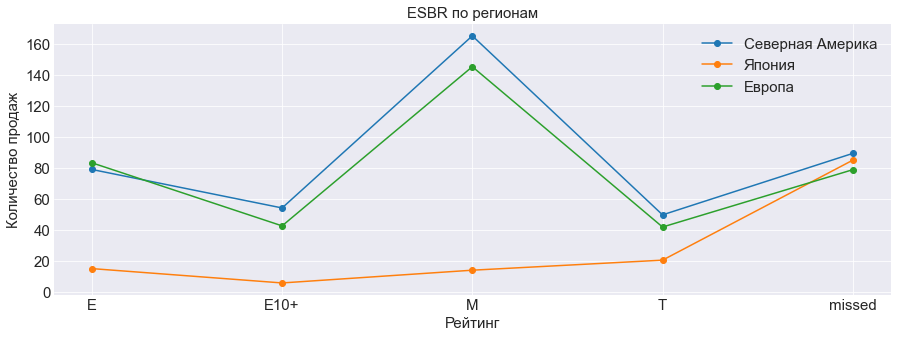

In [75]:
plt.figure(figsize=(15,5))
plt.plot(esbr.index, esbr['na_sales'], 'o-', label = 'Северная Америка')
plt.plot(esbr.index, esbr['jp_sales'], 'o-', label = 'Япония')
plt.plot(esbr.index, esbr['eu_sales'], 'o-', label = 'Европа')

plt.title('ESBR по регионам', fontsize = 15)
plt.legend(prop={'size': 15})


plt.xlabel('Рейтинг', fontsize=15) 
plt.ylabel('Количество продаж', fontsize=15) 
plt.tick_params(axis='both', which='major', labelsize=15)


plt.show()

Большинство игр на рынке имеют рейтинг M (mature 17+)

Далее по популяроности идут игры с рейтингом E (everyone) и Т (teen)

И менее популярны игры с рейтингом E10+(everyone 10+)



Графики между собой похожи. Видно, что у Европы и Северной Америки почти одинаковое соотношение по рейтингам.

У Японии нет сильного различия по продажам в зависимости от рейтинга. Стоит отметить, что в Японии игры с рейтингом М менее популярны, чем в Америке и Европе.

Рейтинг ESBR не влияет на продажи в отдельном регионе. Количество проданных копий в большинсвте зависит от рейтинга игры и самой игры, чем от места, где продается ( маленькое исключение - Япония, где игры для mature 17+ менее востребованы) )


Почти одинаковое количество игр в каждом регионе не имеют рейтинга ESBR

In [76]:
# Комментарий ревьюера
temp = df.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


missed    977
M         369
T         333
E         302
E10+      252
Name: rating, dtype: int64

<font color='blue'>Портрет пользователя из Северной Америки</font> 

In [77]:
from IPython.display import Image # Библиотека для отображения картинок

display(Image(url='https://cdn.fishki.net/upload/post/2017/05/25/2298587/foto-indejtsev-severnoj-ameriki-3.jpg', 
              width = 400) 
       ) 


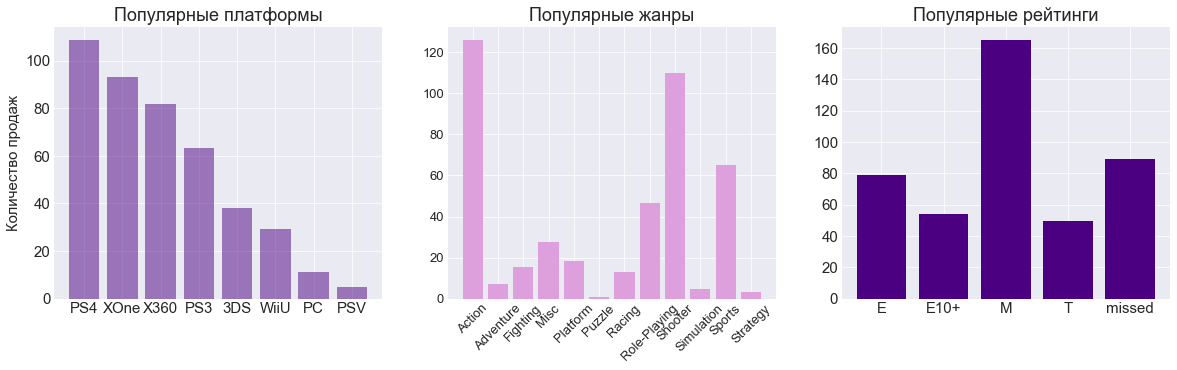

In [78]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.bar(top_platform.index[:8], top_platform['na_sales'][:8], color = 'indigo', alpha = 0.5)
plt.title('Популярные платформы', fontsize=18)
plt.ylabel('Количество продаж', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(1,3,2)
plt.bar(top_genre.index, 
        top_genre['na_sales'], 
        color = 'plum', 
        linewidth = 100
       )
plt.xticks(rotation=45)
plt.title('Популярные жанры', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=13)


plt.subplot(1,3,3)
plt.bar(esbr.index, 
        esbr['na_sales'], 
        color = 'indigo', 
        linewidth = 100
       )
plt.title('Популярные рейтинги', fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

Обычно <font color='blue'>пользователь</font> приобретает игры на данных плафтормах:

- X360 
- PS2
- Wii
- PS3
- DS

В основном он играет в экшн, спортивные игры, шутеры, аркады и гонки. То есть что-то динамичное, быстрое, что требует концетрации

В основном это игры, которые не имеют возрастных ограничений. Иногда он играет в игры, которые предназначены для тинейджеров или строго 17+

In [79]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,missed,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,missed,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,missed,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,missed,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,missed,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,missed,0.01


<font color='red'>Портрет пользователя из Европы</font> 

In [80]:
from IPython.display import Image # Библиотека для отображения картинок

display(Image(url='https://infosmi.net/wp-content/uploads/2022/02/1-87.jpg', 
              width = 400) 
       ) 

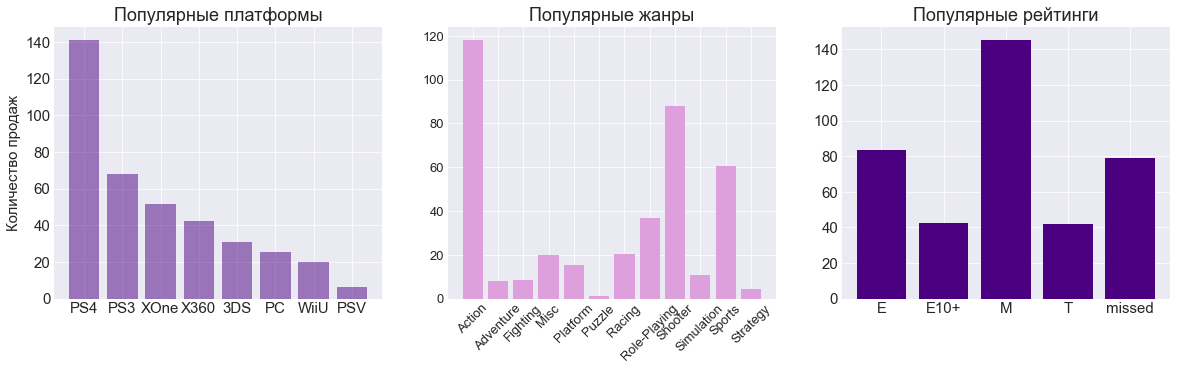

In [81]:
x = top_platform.sort_values(by = 'eu_sales', ascending = False)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.bar(x.index[:8], x['eu_sales'][:8], color = 'indigo', alpha = 0.5)
plt.title('Популярные платформы', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Количество продаж', fontsize=15)

plt.subplot(1,3,2)
plt.bar(top_genre.index, 
        top_genre['eu_sales'], 
        color = 'plum', 
        linewidth = 100
       )
plt.xticks(rotation=45)
plt.title('Популярные жанры', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=13)

plt.subplot(1,3,3)
plt.bar(esbr.index, 
        esbr['eu_sales'], 
        color = 'indigo', 
        linewidth = 100
       )
plt.title('Популярные рейтинги', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

Обычно <font color='red'>пользователь</font> приобретает игры на данных плафтормах:

- PS2
- PS3
- X360 
- Wii
- PS
- DS

В основном он играет в экшн, спортивные игры, шутеры, аркады и гонки.Его вкусы совпадают с северо-американским пользователем.
Аналогично, в основном он играет в  игры, которые не имеют возрастных ограничений. Но иногда и в те,которые предназначены для тинейджеров или строго 17+

<font color='pink'>Портрет пользователя из Японии</font> 

In [82]:
from IPython.display import Image # Библиотека для отображения картинок

display(Image(url='http://davidmfrey.com/wp-content/upLoads/2014/08/JapanScene-1.jpg', 
              width = 400) 
       ) 

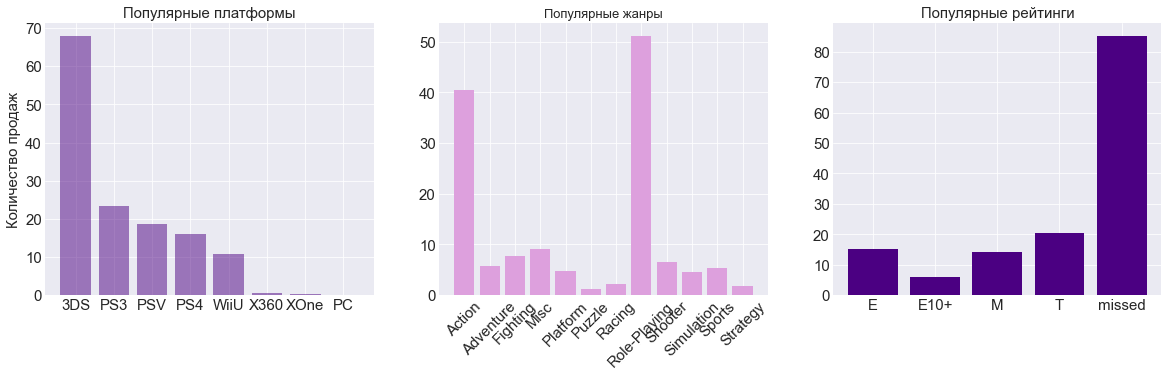

In [83]:
x = top_platform.sort_values(by = 'jp_sales', ascending = False)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.bar(x.index[:8], x['jp_sales'][:8], color = 'indigo', alpha = 0.5)
plt.title('Популярные платформы', fontsize=15)
plt.ylabel('Количество продаж', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(1,3,2)
plt.bar(top_genre.index, 
        top_genre['jp_sales'], 
        color = 'plum', 
        linewidth = 100
       )
plt.xticks(rotation=45)
plt.title('Популярные жанры', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(1,3,3)
plt.bar(esbr.index, 
        esbr['jp_sales'], 
        color = 'indigo', 
        linewidth = 100
       )
plt.title('Популярные рейтинги', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)


plt.show()

<font color='pink'>Пользователь</font> весьма своеобразен по сравнению с жителем северной Америки или Европы

Обычно <font color='pink'>пользователь</font> приобретает игры на данных плафтормах:


- DS
- PS 
- PS2
- 3DS 
- PS3 

В Японии не очень популярна платформа Wii, хотя в других двух регионов она была на 3 и 4 месте по популярности

В основном (почти 30% от всех игра) пользователь играет в ролевые игры (что вообще не популярно в Америке и Европе). А остальной набор жанров (экшн, спорт, аркады) - уже совпадает с набором американского иили европейского пользователя


Большинство игр не имеют строгие рамки и имеют рейтинг Е. Но, в сравнении с другмими регионами можно отметить, что в Японии игры с рейтингом 17+ пользуются меньшей популярностью

In [84]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,missed,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,missed,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,missed,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,missed,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,missed,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,missed,0.01


Выводы по портретам пользователей каждого региона

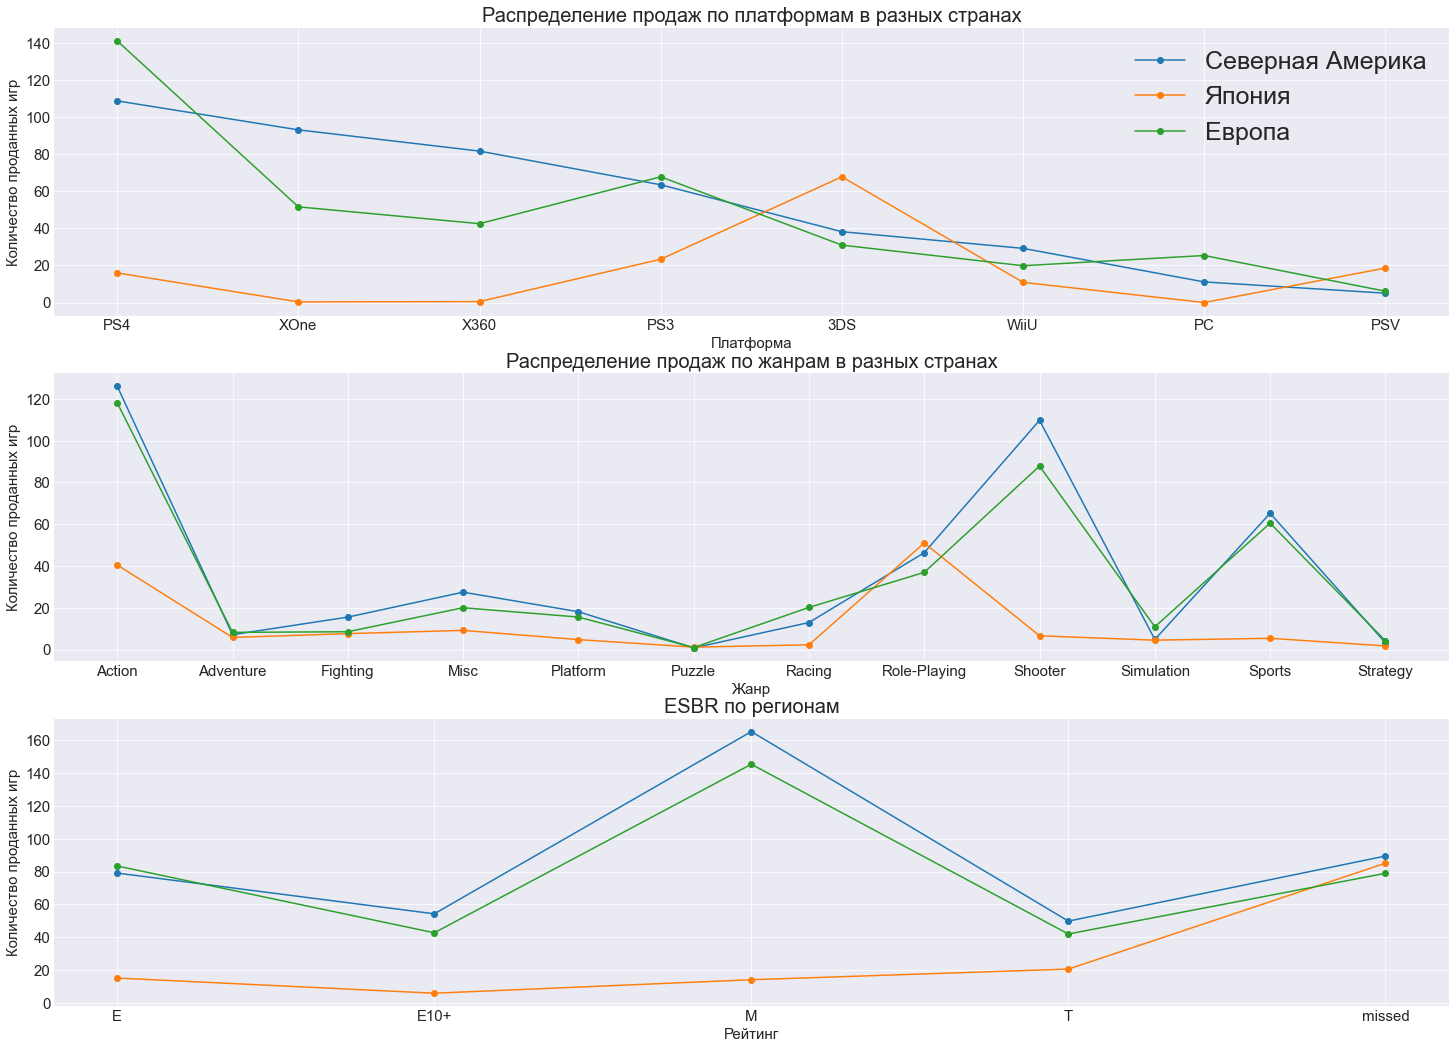

In [85]:
plt.figure(figsize=(25,18))


plt.subplot(3,1,1)
plt.plot(top_platform['na_sales'], 'o-', label = 'Северная Америка')
plt.plot(top_platform['jp_sales'], 'o-', label = 'Япония')
plt.plot(top_platform['eu_sales'], 'o-', label = 'Европа')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(prop={'size': 25})
plt.title('Распределение продаж по платформам в разных странах', fontsize = 20)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Количество проданных игр', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)


plt.subplot(3,1,2)
plt.plot(top_genre['na_sales'], 'o-', label = 'Северная Америка')
plt.plot(top_genre['jp_sales'], 'o-', label = 'Япония')
plt.plot(top_genre['eu_sales'], 'o-', label = 'Европа')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Распределение продаж по жанрам в разных странах', fontsize = 20)
plt.xlabel('Жанр', fontsize=15)
plt.ylabel('Количество проданных игр', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)


plt.subplot(3,1,3)
plt.plot(esbr.index, esbr['na_sales'], 'o-', label = 'Северная Америка')
plt.plot(esbr.index, esbr['jp_sales'], 'o-', label = 'Япония')
plt.plot(esbr.index, esbr['eu_sales'], 'o-', label = 'Европа')
plt.title('ESBR по регионам', fontsize = 20)
plt.xlabel('Рейтинг', fontsize=15) 
plt.ylabel('Количество проданных игр', fontsize=15) 
plt.tick_params(axis='both', which='major', labelsize=15)


plt.show()

Количество проданных игр в разных странах:
 - Северная Америка 1130.41 млн копий
 - Европа 841.21 млн копий
 - Япония 305.14 млн копий
 
Будет интересно посчитать соотношение количества проданных игр к населению региона (в млн).
- В Северной Америке это 1130/580 = **1.9**
- В Европе 841/748 = **1.1**
- В Японии 305/125 = **2.44**

То есть, хоть в Северной Америке и больше продаж игр, но в Японии на одного жителя приходится больше купленных игр. Далее идет Северная Америка и Европа



**Америка**

Популярные платформы: X360(30%), PS3(20%), Wii, PS4, XOne

Популярные жанры: экшн(26%), шутер(21%), спорт, аркады, ролевые игры

Рейтинги популярных игр: 17+ и everyone


**Европа**

Популярные платформы: PS3(25%), X360(19%), PS4(17%), PC и Wii

Популярные жанры: экшн(28%), шутер(20%), спорт, ролевые игры, аркады

Рейтинги популярных игр: 17+ и everyone

**Япония**

Популярные платформы: 3DS(33%), PS3(19%), PSP(14%), DS, PSV

Популярные жанры: ролевые игры(34%), экшн(24%), аркады, приключения, сражения

Рейтинги популярных игр: нет ярко выраженных отличий в рейтинге, но лидируют everyone и teen




Пользователи Америки и Европы похожи между собой по предпочтениям, Япония в этом плане более самобытна и отличается от данных регионов 

## Проверка гипотез

Первая гипотеза

- Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные

In [86]:
from scipy import stats as st

alpha = .05

xone = df.query('platform=="XOne" & ~(user_score.isna())')['user_score']
pc = df.query('platform=="PC" & ~(user_score.isna())')['user_score']

res = st.ttest_ind(xone, pc)

print('p-значение:', res.pvalue) 

if res.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")




p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Вторая гипотеза


    
- Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports  одинаковые

- Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

In [87]:
from scipy import stats as st

alpha = .05

action = df.query('genre=="Action" & ~(user_score.isna())')['user_score']
sports = df.query('genre=="Sports" & ~(user_score.isna())')['user_score']

res = st.ttest_ind(action, sports)

print('p-значение:', res.pvalue) 

if res.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")




p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


В работе мы сформулировали нулевую гипотезу исходя из задания, альтертнативную гипотезу мы сформулировали на основании того, что она должна ставить такое условие, которое случается, если отбрасывается нулевая гипотеза

Далее мы использовали специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам



Как итог 
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- средние пользовательские рейтинги жанров Action и Sports разные

## Вывод

Сделаем вывод на основе цели (выявить определяющие успешность игры закономерности для нахождения потенциально популярного продукта и запуска успешной рекламной кампании)

Следует помнить, что плафторма в среднем актуальна 9-11 лет и стоит для выпуска брать новые платформы, которые начинают развиваться. Мы выделили такие как PS4 и XOne

Высокий рейтинг - не 100% гарантия высоких продаж. Но в рекламной кампании стоит указать рейтинг, который поставили критики, так как высокие продажи именно у игр с высоким рейтингом критиков

Рейтинг пользователей сильно на продажи не влияет

Как правило, люди предпочитают динамичные игры, например экшн, шутер, спортивные игры, ролевые и аркады. Наименее популярны пазлы, стратегия.

Продукт нужно создавать специально под целевую аудиторию. Тут стоит отметить, что Япония по своим любительским характеристикам отличается от Европы и Америки.

Если выпускать игру в Америке и Европе, то стоит обратить внимание на следующие показатели:
- по жанрам лидирует экшн (27%) и шутер(20%)
- популярные платформы PS3 и Х360 (но они начинают устаревать и с каждым годом продаж меньше, необходимо менять платформы и обратить внимание на потенциально прибыльные)
- обычно играют в игры с рейтингом everyone и 17+ (то есть нет широкой специфичной публики, которая предпочитает игры для взрослых (жестокие) или, наоборот, для детей)

Если речь о Японии, то можно выделить следующее:

- популярные жанры - ролевые игры (34%) и экшн(24%)
- самая популярная платформа 3DS (33% продаж), но она актуальна только в Японии. Также в топе PS3(19%)
- рейтинг игр не сильно влияет на продажи, специфичной публики нет

Итак, если делать универсальный продукт, то скорее всего 
- жанр - экшн
- платформа - PS3 (есть риск утраты актуальности). Можно попробjвать сделать ставку на PS4 и X360


